In [110]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import os
import pandas as pd
import seaborn

In [111]:
#Retrieve Files
csv1 = os.path.join('raw_data', 'city_data.csv')
csv2 = os.path.join('raw_data','ride_data.csv')

In [136]:
#Read Files
csv1_df = pd.read_csv(csv1, encoding='ISO-8859-1')
csv2_df = pd.read_csv(csv2, encoding='ISO-8859-1')

In [113]:
#Total Number of Rides
total=csv2_df['city'].value_counts()

total1=total.to_frame(name=None)

csv_count=total1.reset_index()

csv_count=csv_count.rename(columns={'index':'city','city':'count'})

csv_count.head()

,city,count
0,Swansonbury,34
1,Port Johnstad,34
2,Port James,32
3,South Louis,32
4,Alvarezhaven,31


In [114]:
#Clean Data
csv3=csv2_df.drop(columns=['date','ride_id'])

csv3.head()

,city,fare
0,Sarabury,38.35
1,South Roy,17.49
2,Wiseborough,44.18
3,Spencertown,6.87
4,Nguyenbury,6.28


In [115]:
#Find Average Ride Costs
csv4=csv3.groupby(['city'],as_index=False).mean()

csv4.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [116]:
#Final DF
new_df=pd.merge(csv1_df, csv4, on='city')

new_df=pd.merge(new_df, csv_count, on='city')

new_df.head()

,city,driver_count,type,fare,count
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


Text(31.2105,0.5,'Average Fare ($)')

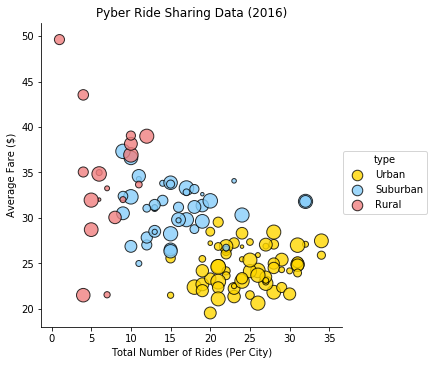

In [134]:
d_count=new_df['driver_count']

seaborn.lmplot(x='count',y='fare',data=new_df, hue='type', palette=dict(Urban='gold', Suburban='lightskyblue',Rural='lightcoral'),fit_reg=False, scatter_kws={'s': d_count*3, 'edgecolors':'black'})
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

In [92]:
#Total Rides Data
per_df=new_df.groupby('type')
per_df=per_df.count()

per_df=per_df.drop(columns=['driver_count','fare','count'])
per_df=per_df.rename(columns={'city':'counts'})
count_sum=per_df['counts'].sum()

Text(0.5,1,'Total Rides')

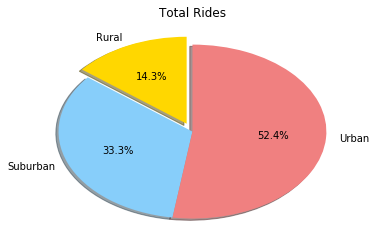

In [131]:
#Total Rides Pie
labels = ["Rural", "Suburban", "Urban"]
sizes = [(18/126)*100, (42/126)*100,(66/126)*100]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=90)
plt.title("Total Rides")

In [94]:
#Total Fare Data
total_sum=new_df['fare'].sum()
urban_sum=new_df.loc[new_df['type']=='Urban']['fare'].sum()
suburban_sum=new_df.loc[new_df['type']=='Suburban']['fare'].sum()
rural_sum=new_df.loc[new_df['type']=='Rural']['fare'].sum()

Text(0.5,1,'Total Average Fares')

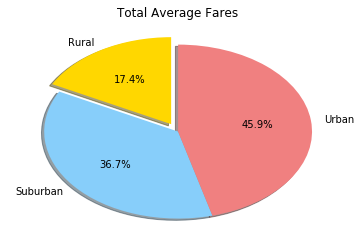

In [130]:
#Total Fare Pie
labels = ["Rural", "Suburban", "Urban"]
sizes = [(rural_sum/total_sum)*100, (suburban_sum/total_sum)*100,(urban_sum/total_sum)*100]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=90)
plt.title("Total Average Fares")

In [96]:
#Driver Count Data
total_count=new_df['driver_count'].sum()
urban_count=new_df.loc[new_df['type']=='Urban']['driver_count'].sum()
suburban_count=new_df.loc[new_df['type']=='Suburban']['driver_count'].sum()
rural_count=new_df.loc[new_df['type']=='Rural']['driver_count'].sum()

Text(0.5,1,'Driver Count')

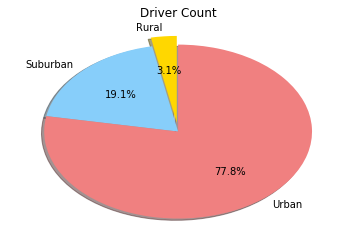

In [129]:
#Driver Count Pie
labels = ["Rural", "Suburban", "Urban"]
sizes = [(rural_count/total_count)*100, (suburban_count/total_count)*100,(urban_count/total_count)*100]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=90)

plt.title("Driver Count")